In [106]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
L = 3       # length of Laval nozzle
dx = 0.1
x = np.arange(0,3.1,dx)  # dimensionless x/L
gamma = 1.4    
R = 287.1    # unit: J/(K*kg)
C = 0.5        # Courant number

In [108]:
def rho_init_fun(x):
    return 1 - 0.314*x
def T_init_fun(x):
    return 1 - 0.2314*x
def V_init_fun(x,T):
    return (0.1 + 1.09*x)*(np.sqrt(T))
def A_fun(x):
    return 1 + 2.2*(x-1.5)**2

In [130]:
# initial conditions
N = 1000                 # number of time steps
time = 0
rho = np.zeros((N,31))
T = np.zeros((N,31))
V = np.zeros((N,31))
p = rho*T

rho[0,:] = rho_init_fun(x) # dimensionless rho/rho0
T[0,:] = T_init_fun(x)     # dimensionless T/T0
V[0,:] = V_init_fun(x,T[0,:])   # dimensionelss V/V0
a = np.sqrt(T)   # dimensionless a/a0
Ma = V/a
A = A_fun(x)          # dimensionless A/A*
drhodt = np.zeros(31)   
dVdt = np.zeros(31)
dTdt = np.zeros(31)
drhobdt = np.zeros(31)   
dVbdt = np.zeros(31)
dTbdt = np.zeros(31)
drhodtav = np.zeros(31)  
dVdtav = np.zeros(31)
dTdtav = np.zeros(31)

# time step
for n in range(N-1):
    for i in range(1,30):
        drhodt[i] = -V[n,i]*(rho[n,i+1]-rho[n,i])/dx - rho[n,i]*(V[n,i+1]-V[n,i])/dx - rho[n,i]*V[n,i]*(np.log(A[i+1])-np.log(A[i]))/dx
        dVdt[i] = -V[n,i]*(V[n,i+1]-V[n,i])/dx - 1/gamma*((T[n,i+1]-T[n,i])/dx+T[n,i]/rho[n,i]*(rho[n,i+1]-rho[n,i])/dx)
        dTdt[i] = -V[n,i]*(T[n,i+1]-T[n,i])/dx - (gamma-1)*T[n,i]*((V[n,i+1]-V[n,i])/dx+V[n,i]*(np.log(A[i+1])-np.log(A[i]))/dx)
    dtime = C*dx/(V[n,:]+a[n,:])
    dt = min(dtime)
    rhob = rho[n,:] + drhodt*dt
    Vb = V[n,:] + dVdt*dt
    Tb = T[n,:] + dTdt*dt
    for i in range(1,30):
        drhobdt[i] = -Vb[i]*(rhob[i]-rhob[i-1])/dx - rhob[i]*(Vb[i]-Vb[i-1])/dx - rhob[i]*Vb[i]*(np.log(A[i])-np.log(A[i-1]))/dx
        dVbdt[i] = -Vb[i]*(Vb[i]-Vb[i-1])/dx - 1/gamma*((Tb[i]-Tb[i-1])/dx + Tb[i]/rhob[i]*(rhob[i]-rhob[i-1])/dx)
        dTbdt[i] = -Vb[i]*(Tb[i]-Tb[i-1])/dx - (gamma-1)*Tb[i]*((Vb[i]-Vb[i-1])/dx + Vb[i]*(np.log(A[i])-np.log(A[i-1]))/dx)
    drhodtav = 1/2*(drhodt + drhobdt)
    dVdtav = 1/2*(dVdt + dVbdt)
    dTdtav = 1/2*(dTdt + dTbdt)
    rho[n+1,:] = rho[n,:] + drhodtav*dt
    V[n+1,:] = V[n,:] + dVdtav*dt
    T[n+1,:] = T[n,:] + dTdtav*dt
    p[n+1,:] = rho[n+1,:]*T[n+1,:]
    a[n+1,:] = np.sqrt(T[n+1,:])
    Ma[n+1,:] = V[n+1,:]/a[n+1,:]

    # update boundaries
    V[n+1,0] = 2*V[n+1,1] - V[n+1,2]
    V[n+1,30] = 2*V[n+1,29] - V[n+1,28]
    rho[n+1,30] = 2*rho[n+1,29] - rho[n+1,28]
    T[n+1,30] = 2*T[n+1,29] - T[n+1,28]

E:\SYSTEMFILE\temp\ipykernel_16696\1575525696.py:13: RuntimeWarning: invalid value encountered in divide
  Ma = V/a


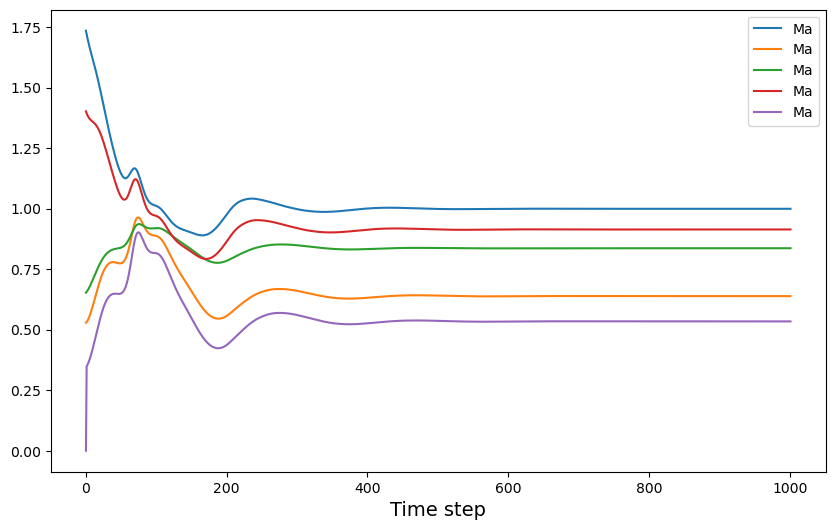

In [131]:
X = np.linspace(0,1001,1000)
plt.figure(figsize=(10,6))
plt.plot(X, Ma[:,15], label='Ma')
plt.plot(X, rho[:,15], label='Ma')
plt.plot(X, T[:,15], label='Ma')
plt.plot(X, V[:,15], label='Ma')
plt.plot(X, p[:,15], label='Ma')
plt.xlabel('Time step', fontsize=14)
plt.legend()
plt.show()